In [1]:
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        

        
    plt.title(title)
    
    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    
    ax.legend(loc='upper right')
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()

In [3]:
def plotROCCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import plot_roc_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVM', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_roc_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        

        
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    
    ax.legend(loc='lower right')
    #plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/baseline/' + fileName)
    
    plt.show()

In [4]:
def tuneF05(precision, recall, thresholds, modelName):
    
    # convert to F0.5 score
    beta = 0.5 
    f05score = ( (1 + pow(0.5, 2)) * precision * recall ) / (pow(0.5, 2)* precision + recall )


    # locate the index of the largest f 0.5 score
    ix = nanargmax(f05score)


    print('Best Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], f05score[ix]))
    print('Precision at largest F05 score=%.2f, Recall at largest F05 score=%.2f' % (precision[ix], recall[ix]))


    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    pyplot.plot(recall, precision, marker='.', label=modelName, zorder=1)

    # set zorder so dots appear over line
    pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F0.5 Score', zorder=2)

    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    
    # save plot
    print(modelName)
    plt.savefig('figures/thresholdTuning/precision_recall_f05score_' + modelName +'.png')


    # show the plot
    pyplot.show()

In [5]:
def fitModels(X_train, X_test, y_train, y_test):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.calibration import CalibratedClassifierCV

    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))  
    models.append(('SVM', SVC(probability=True)))
    svm = LinearSVC()
    nb = GaussianNB()
    models.append(('LinearSVM', CalibratedClassifierCV(svm))) 
    models.append(('NB', CalibratedClassifierCV(nb)))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))

    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        # predict probabilities
        y_pred = model.predict_proba(X_test)

        # keep probabilities for the positive outcome only
        y_pred = y_pred[:, 1]

        # calculate roc curves
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
        
        tuneF05(precision, recall, thresholds, name)
        

In [6]:
import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [7]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax, nanargmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# read data
X = pd.read_csv("BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("BibGDMDependentVariableLGAEncoded.csv")

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


#dt = DecisionTreeClassifier()
#dt.fit(trainX,trainy)
#from sklearn.metrics import plot_precision_recall_curve
#plot_precision_recall_curve(dt, testX, testy, ax = plt.gca(), name = "Decision Tree")



baseline_precision-recall.png


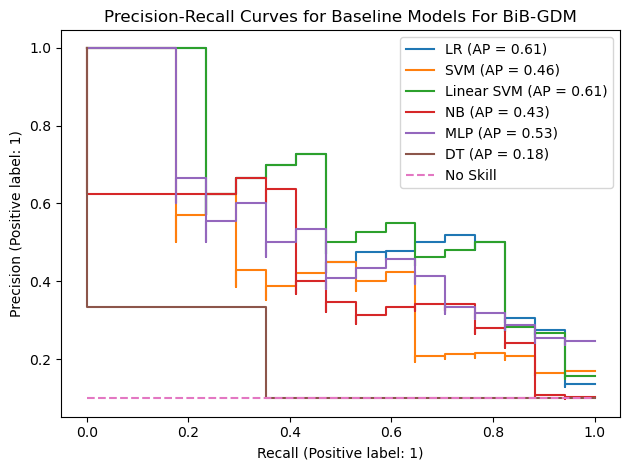

In [8]:
# plot PR curves for all models
plotPrecisionRecallCurves(X_train, X_test, y_train, y_test,
                          "Precision-Recall Curves for Baseline Models For BiB-GDM", "baseline_precision-recall")


baseline_roc.png


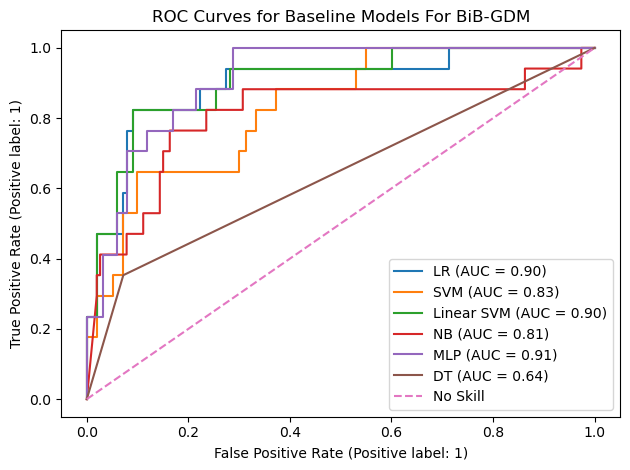

In [9]:
#plot ROC curves for all models
plotROCCurves(X_train, X_test, y_train, y_test,
                          "ROC Curves for Baseline Models For BiB-GDM", "baseline_roc")

Best Threshold=0.46, F0.5-Score=0.66
Precision at largest F05 score=0.73, Recall at largest F05 score=0.47
LR


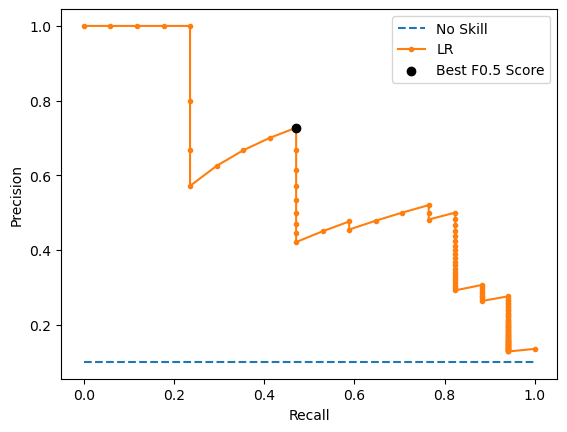

Best Threshold=0.79, F0.5-Score=0.52
Precision at largest F05 score=1.00, Recall at largest F05 score=0.18
SVM


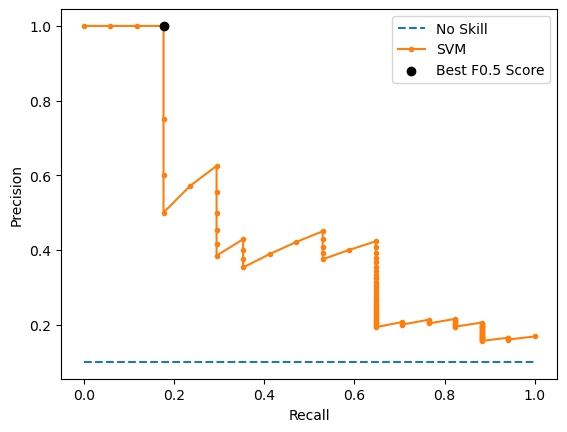

Best Threshold=0.38, F0.5-Score=0.66
Precision at largest F05 score=0.73, Recall at largest F05 score=0.47
LinearSVM


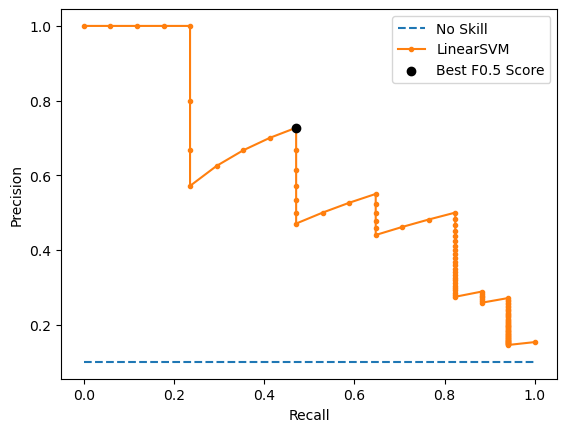

Best Threshold=0.13, F0.5-Score=0.66
Precision at largest F05 score=0.78, Recall at largest F05 score=0.41
NB


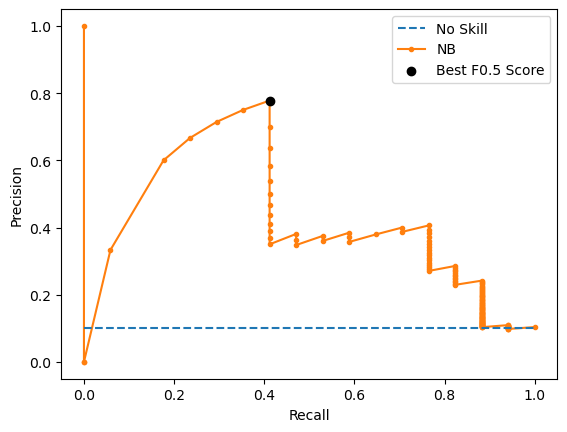

Best Threshold=0.83, F0.5-Score=0.61
Precision at largest F05 score=1.00, Recall at largest F05 score=0.24
MLP


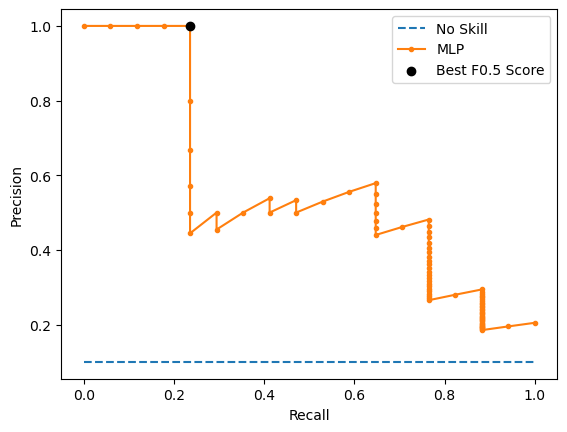

Best Threshold=1.00, F0.5-Score=0.37
Precision at largest F05 score=0.38, Recall at largest F05 score=0.35
DT


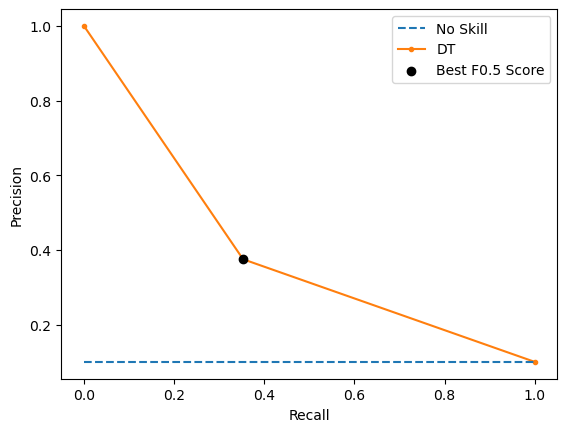

In [10]:
# tune threshold for optimal F0.5 score for each model and plot pr curve
fitModels(X_train, X_test, y_train, y_test)

In [58]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# read data
X = pd.read_csv("BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("BibGDMDependentVariableLGAEncoded.csv")

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Threshold=0.403037, F-Score=0.605
0.10141509433962265


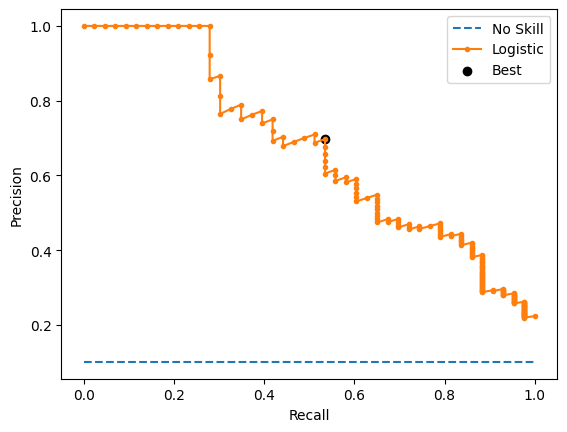

In [59]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))


#plot horizontal line for no-skill model
no_skill = len(testy[testy['0']==1]) / len(testy)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [62]:
# predict labels
yhat = model.predict(testX)
# evaluate the model
f1 = f1_score(testy, yhat)
print('F-Score: %.2f' % f1)

from sklearn.metrics import fbeta_score
f05 = fbeta_score(testy, yhat, beta=0.5)
print('F0.5-Score: %.2f' % f05)


# Therefore, using a 0.5 threshold results in an F1 score of 0.54
# However, tuning threshold to 0.40 results in F1 score of 0.61

# Therefore, using a 0.5 threshold results in an F0.5 score of 0.65
# However, tuning threshold to 0.59 results in F0.5 score of 0.66

F-Score: 0.54
F0.5-Score: 0.65


Best Threshold=0.59, F0.5-Score=0.66
Precision at largest F05 score=1.00, Recall at largest F05 score=0.28
Best Threshold=0.40, F-Score=0.61
Precision at largest F-score=0.70, Recall at largest F-score=0.53


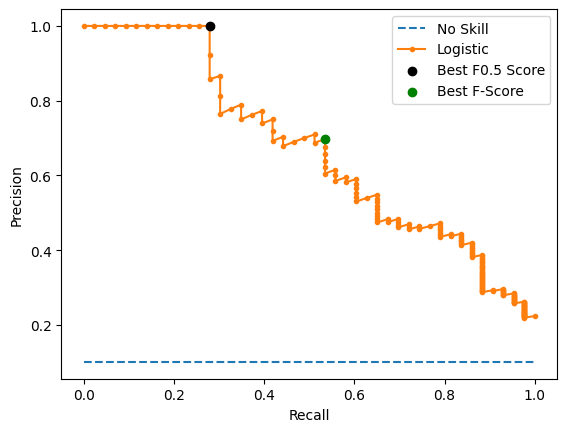

In [66]:
# convert to F0.5 score
beta = 0.5 
f05score = ( (1 + pow(0.5, 2)) * precision * recall ) / (pow(0.5, 2)* precision + recall )

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f 0.5 score
ix = argmax(f05score)

# locate the index of the largest f score
ix1 = argmax(fscore)


print('Best Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], f05score[ix]))
print('Precision at largest F05 score=%.2f, Recall at largest F05 score=%.2f' % (precision[ix], recall[ix]))

print('Best Threshold=%.2f, F-Score=%.2f' % (thresholds[ix1], fscore[ix1]))
print('Precision at largest F-score=%.2f, Recall at largest F-score=%.2f' % (precision[ix1], recall[ix1]))


# plot the roc curve for the model
no_skill = len(testy[testy['0']==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic', zorder=1)

# set zorder so dots appear over line
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F0.5 Score', zorder=2)
pyplot.scatter(recall[ix1], precision[ix1], marker='o', color='green', label='Best F-Score', zorder=3)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

pyplot.savefig('figures/thresholdTuning/precision_recall_fscore_f05score.png')

# show the plot
pyplot.show()

In [64]:
# Function to plot a confusion matrix 
def conf_matrix(y_test, y_pred):    
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))
    
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0] 
    
    print('Classification Accuracy: %.3f' % metrics.accuracy_score(y_test, y_pred))
    print('Classification Error: %.3f' % (1 - metrics.accuracy_score(y_test, y_pred)))
    print('Sensitivity: %.3f' % metrics.recall_score(y_test, y_pred))
    print('Specificity: %.3f' % (TN / float(TN + FP)))
    print('False Positive Rate: %.3f' % (FP / float(TN + FP)))
    print('Precision: %.3f' % (TP / float(TP + FP)))
    print('F1 Score: %.3f' % metrics.f1_score(y_test, y_pred))
    print('F0.5 Score: %.3f' % metrics.fbeta_score(y_test, y_pred, beta=0.5))
    print('AUC: %.3f' % metrics.roc_auc_score(y_test, y_pred))

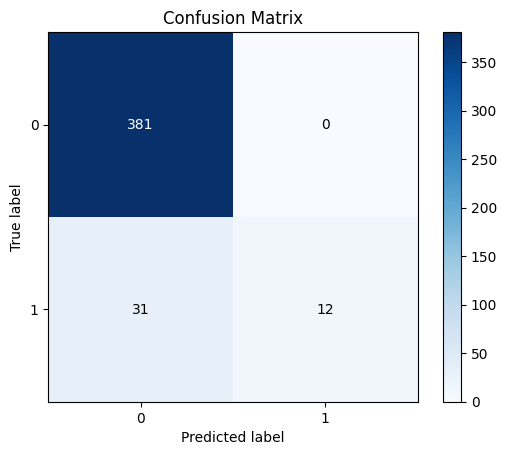

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       381
           1       1.00      0.28      0.44        43

    accuracy                           0.93       424
   macro avg       0.96      0.64      0.70       424
weighted avg       0.93      0.93      0.91       424

Classification Accuracy: 0.927
Classification Error: 0.073
Sensitivity: 0.279
Specificity: 1.000
False Positive Rate: 0.000
Precision: 1.000
F1 Score: 0.436
F0.5 Score: 0.659
AUC: 0.640


In [65]:
# y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred = (model.predict_proba(testX)[:,1] >= 0.5946536465).astype(bool) # set threshold as 0.59

conf_matrix(testy, y_pred)